#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [3]:
import pandas as pd

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, KFold
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [4]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("train.csv")

## Data exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [6]:
train['Weight'] = train['Weight'].str.replace('kg','')

In [150]:
#train.drop(columns=['Product', 'TypeName', 'Weight'], inplace=True)

In [7]:
train['Ram'] = train['Ram'].str.replace('GB','')

In [8]:
train['Ram'].unique()

array(['8', '6', '4', '16', '24', '12', '64', '32', '2'], dtype=object)

In [9]:
train.isnull().sum()

id                  0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
train['Ram'] = train['Ram'].astype('int32')
train['Weight'] = train['Weight'].astype('float32')


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int32  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float32
 12  Price_euros       912 non-null    float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 85.6+ KB


In [12]:
train['Memory'] = train['Memory'].str.replace("TB HDD","")
train['Memory'] = train['Memory'].str.replace("GB SSD","")
train['Memory'] = train['Memory'].str.replace("GB HDD","")
train['Memory'] = train['Memory'].str.replace("GB Flash Storage","")
train['Memory'] = train['Memory'].str.replace("TB Hybrid","")
train['Memory'] = train['Memory'].str.replace("GB Hybrid","")
train['Memory'] = train['Memory'].str.replace("TB SSD","")


In [13]:
train['Memory'].value_counts()

256           309
1             158
512            89
500            86
128 +  1       67
128            49
256 +  1       49
32             32
2              12
64             11
1.0             9
16              9
512 +  1        8
256 +  2        6
180             4
1 +  1          3
512 +  2        3
128 +  2        2
64 +  1         1
512 +  1.0      1
508             1
512 +  256      1
256 +  500      1
8               1
Name: Memory, dtype: int64

In [15]:
train['Memory'] = train['Memory'].str.replace('128 +  1','128', regex=False)
train['Memory'] = train['Memory'].str.replace("256 +  1","256", regex=False)
train['Memory'] = train['Memory'].str.replace("512 +  1","8", regex=False)
train['Memory'] = train['Memory'].str.replace("256 +  2","256", regex=False)
train['Memory'] = train['Memory'].str.replace("1 +  1","1", regex=False)
train['Memory'] = train['Memory'].str.replace("512 +  2","512", regex=False)
train['Memory'] = train['Memory'].str.replace("128 +  2","128", regex=False)
train['Memory'] = train['Memory'].str.replace("64 +  1","64", regex=False)
train['Memory'] = train['Memory'].str.replace("512 +  1.0","512", regex=False)
train['Memory'] = train['Memory'].str.replace("512 +  256","512", regex=False)
train['Memory'] = train['Memory'].str.replace("256 +  500","512", regex=False)
train['Memory'] = train['Memory'].str.replace("51256","512", regex=False)
train['Memory'] = train['Memory'].str.replace("1.0","1", regex=False)
train['Memory'] = train['Memory'].str.replace("8.0","8", regex=False)

In [16]:
train['Memory'].unique()

array(['1', '256', '128', '32', '500', '2', '180', '512', '8', '16', '64',
       '508'], dtype=object)

In [17]:
train['Memory'] = train['Memory'].astype('int32')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int32  
 8   Memory            912 non-null    int32  
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float32
 12  Price_euros       912 non-null    float64
dtypes: float32(1), float64(2), int32(2), int64(1), object(7)
memory usage: 82.1+ KB


## Data processing

In [19]:
train.describe()

,id,Inches,Ram,Memory,Weight,Price_euros
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,653.076754,15.003289,8.475877,222.427632,2.040033,1138.022478
std,378.906322,1.437009,5.117872,173.054065,0.680480,715.342718
min,0.000000,10.100000,2.000000,1.000000,0.690000,174.000000
25%,317.750000,14.000000,4.000000,32.000000,1.490000,615.500000
50%,657.500000,15.600000,8.000000,256.000000,2.040000,989.000000
75%,980.500000,15.600000,8.000000,256.000000,2.300000,1493.350000
max,1302.000000,17.300000,64.000000,512.000000,4.600000,6099.000000


In [20]:
train['OpSys'].unique()

array(['Linux', 'Windows 10', 'Windows 10 S', 'No OS', 'Windows 7',
       'Chrome OS', 'macOS', 'Mac OS X'], dtype=object)

In [22]:
mymap = {'Linux':1, 'Windows 10':2, 'Windows 10 S':3, 'No OS':4, 'Windows 7':5,
       'Chrome OS':6, 'macOS':7, 'Mac OS X':8}

In [23]:
train2 = train.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [84]:
train2['OpSys'].value_counts()

2    758
1     42
4     40
5     32
6     18
7      9
8      7
3      6
Name: OpSys, dtype: int64

C:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


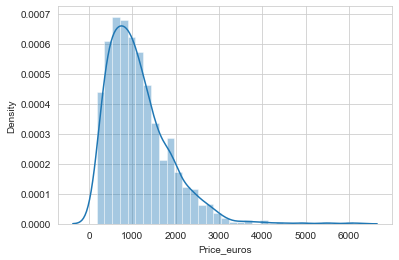

In [26]:
sns.distplot(train2['Price_euros'])
sns.set_style('whitegrid')
plt.show();

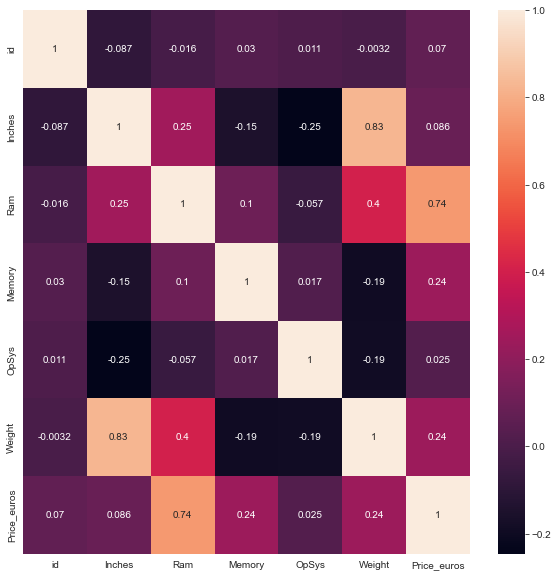

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(train2.corr(), annot=True);

In [167]:
inches = train['Inches']
price = train['Price_euros']
ram = train['Ram']
screen = train['ScreenResolution']
type = train['TypeName']


C:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


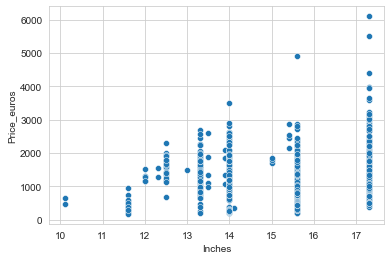

In [168]:
sns.scatterplot(inches,price);


C:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


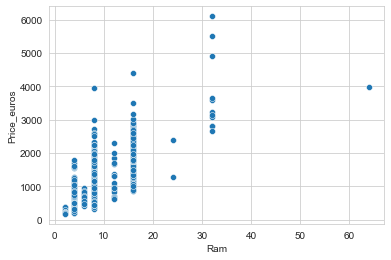

In [169]:
sns.scatterplot(ram,price);


In [170]:
train['Ram'].unique()

array([ 8,  6,  4, 16, 24, 12, 64, 32,  2])

C:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


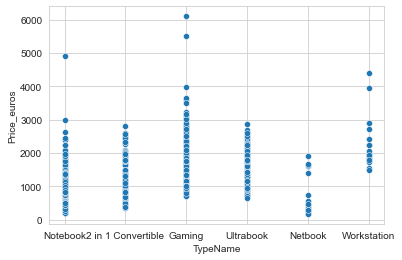

In [171]:
sns.scatterplot(type,price);

C:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


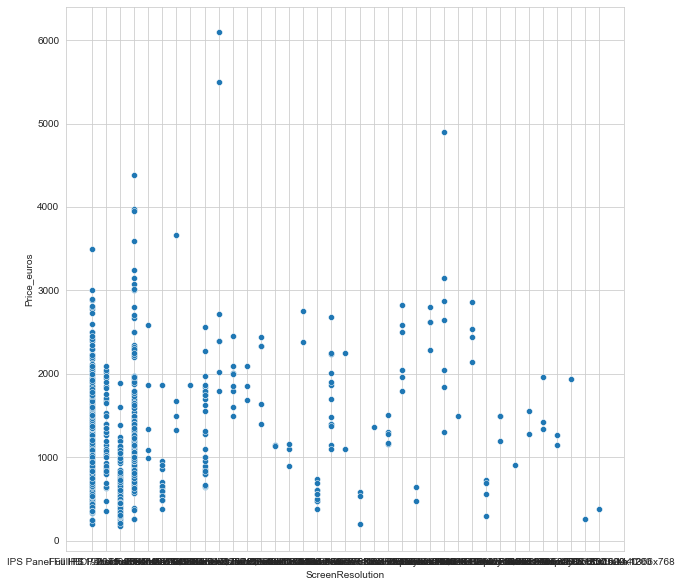

In [172]:
plt.figure(figsize=(10,10))
sns.scatterplot(screen,price);

In [173]:
train['ScreenResolution'].unique()

array(['Full HD 1920x1080', 'IPS Panel Full HD / Touchscreen 1920x1080',
       '1366x768', 'IPS Panel Full HD 1920x1080', 'Touchscreen 2256x1504',
       '1600x900', '4K Ultra HD 3840x2160',
       'Touchscreen / Quad HD+ 3200x1800',
       'Full HD / Touchscreen 1920x1080',
       '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Quad HD+ 2560x1440', 'IPS Panel Touchscreen 2560x1440',
       'IPS Panel Quad HD+ 3200x1800', '1440x900', '2560x1440',
       'Touchscreen 1366x768', 'Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160', '1920x1080',
       'Touchscreen / Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440', 'Touchscreen 2560x1440',
       'IPS Panel Touchscreen 1920x1200', 'IPS Panel 2560x1440',
       'IPS Panel 4K Ultra HD 3840x2160', 'IPS Panel Full HD 2160x1440',
       'IPS Panel Retina Display 2880x1800', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ / T

In [174]:
train['ScreenResolution'].value_counts()

Full HD 1920x1080                                356
1366x768                                         196
IPS Panel Full HD 1920x1080                      151
IPS Panel Full HD / Touchscreen 1920x1080         43
Full HD / Touchscreen 1920x1080                   31
1600x900                                          18
Quad HD+ / Touchscreen 3200x1800                  13
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel 4K Ultra HD 3840x2160                    7
4K Ultra HD / Touchscreen 3840x2160                7
Touchscreen 2560x1440                              6
IPS Panel Touchscreen 2560x1440                    5
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel Retina Display 2880x1800                 4
4K Ultra HD 3840x2160                              4
IPS Panel 1366x768                                 4
IPS Panel 2560x1440                           

In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['ScreenResolution'])
le.transform(train['ScreenResolution'])

array([ 8, 13,  8,  0,  0,  8, 15, 34,  8,  0,  0,  0,  8, 15,  8,  0,  2,
        0, 15,  8, 15,  8, 15,  0, 15,  0,  0,  8,  0, 15,  6,  8,  8,  8,
       13,  8, 15,  8,  8,  0,  0,  8,  8, 13, 32, 13, 15,  0, 13,  8,  0,
        0,  8,  8,  8,  7,  8, 13,  5,  8, 11,  8,  8, 15, 20,  8,  0, 11,
        8,  0, 15,  0, 15,  0,  0, 34,  8, 13,  8, 15, 15, 15,  2,  0,  8,
        8,  8, 13, 34,  8,  8,  0,  0,  0,  8,  8,  8,  8, 13, 13, 15,  8,
        7, 15,  0,  8, 15,  0, 15,  2, 15,  0,  8,  0,  8, 15,  8,  8,  0,
        8, 15,  8,  8,  8, 15, 15,  8,  0,  0,  8,  8,  0,  0,  0,  8,  8,
        8, 15,  0, 15,  0, 11,  8,  8,  8,  8,  0,  8, 28, 15,  0,  8, 13,
        2, 15,  0,  8, 15,  8,  0, 21,  7,  8,  6,  8,  8,  8,  0,  0, 15,
        0,  8, 13,  8, 15,  8,  8, 15,  8,  8,  0,  8,  1,  0,  8,  8,  0,
        0, 15, 15,  0,  8,  5,  8,  0,  4, 15, 33, 15,  0, 13,  2,  8, 15,
        8,  8,  0,  8, 15,  8, 13, 15,  8,  2,  8, 29,  0,  8,  8, 25,  8,
        0,  0, 15,  8,  8

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [28]:
train2.columns

Index(['id', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [29]:
X = train2[['Ram', 'Inches', 'Weight', 'Memory', 'OpSys']]
y = train2['Price_euros'].copy()
X.shape

(912, 5)

In [30]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [32]:
X_train

,Ram,Inches,Weight,Memory,OpSys
25,8,14.0,1.60,256,2
84,4,12.5,1.26,500,2
10,4,15.6,2.18,128,2
342,16,13.3,0.81,256,2
890,4,14.0,1.40,32,2
...,...,...,...,...,...
106,8,14.0,1.90,256,2
270,16,15.6,1.93,512,2
860,16,15.6,2.65,128,2
435,8,13.3,0.81,256,2


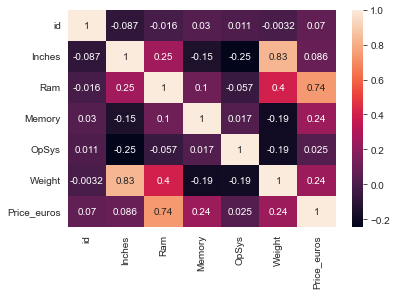

In [33]:
sns.heatmap(train2.corr(), annot=True);

### 3. Asignar el modelo (vacío) a una variable


In [34]:
train_model = LinearRegression()

In [35]:
train_model.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = train_model.predict(X_test)
predictions

array([ 799.70006851, 1751.43417967, 1140.60905711, 1136.11590976,
       1215.9241614 ,  712.98750915, 2011.06499911, 1152.22238524,
       1301.12414271, 1042.49381694,  678.14746938, 1034.41390476,
        789.30053394,  958.31159824, 1046.49159866,  766.07384999,
        880.21816076, 1861.21515161, 1075.17671973, 7160.74325428,
        960.03911798, 1479.06730072,  547.53884026,  295.09452885,
        904.57561667, 1054.7731261 , 1204.17332142, 1041.38190164,
       1162.72880606,  810.20455227, 1087.8352557 , 1236.58482927,
       1052.99524362,  886.30890845,  479.2767205 , 1059.67915688,
       1131.47056466,  789.30053394,  515.84425232,  789.30053394,
        911.85825803,  467.66339237, 1057.64057487, 1101.12369993,
        749.81517676, 1047.18857955, 1185.38732277, 1096.47836867,
       1159.34257987,  770.71918124,  549.52294543,  874.65777648,
        891.83148889,  695.30725644, 1076.22192757,  573.31778278,
       2211.65390717, 2166.82035955,  882.7210115 , 1062.24812

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [37]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 321.3836384755095


In [38]:
train_model.fit(X,y)

LinearRegression()

In [39]:
print(y_test)

649     265.00
761    1059.00
545    1474.00
367    1579.00
361    1760.00
        ...   
344    2122.00
581    1249.26
872    1144.50
449     945.00
789    1799.00
Name: Price_euros, Length: 183, dtype: float64


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [40]:
X_pred = pd.read_csv("test.csv", index_col = 0)
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18kg
815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg
1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.16kg
443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,2.2kg


In [41]:
X_pred.shape

(391, 11)

**¿Por qué da error?** 

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [42]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

In [64]:
testpd = pd.read_csv("test.csv", index_col=0)
testpd.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18kg
815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg
1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.16kg
443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,2.2kg


In [65]:
testpd['Weight'] = testpd['Weight'].str.replace('kg','')
testpd['Ram'] = testpd['Ram'].str.replace('GB','')

In [66]:
testpd['Ram'] = testpd['Ram'].astype('int32')
testpd['Weight'] = testpd['Weight'].astype('float32')

In [67]:
testpd['Memory'] = testpd['Memory'].str.replace("TB HDD","")
testpd['Memory'] = testpd['Memory'].str.replace("GB SSD","")
testpd['Memory'] = testpd['Memory'].str.replace("GB HDD","")
testpd['Memory'] = testpd['Memory'].str.replace("GB Flash Storage","")
testpd['Memory'] = testpd['Memory'].str.replace("TB Hybrid","")
testpd['Memory'] = testpd['Memory'].str.replace("GB Hybrid","")
testpd['Memory'] = testpd['Memory'].str.replace("TB SSD","")
testpd['Memory'] = testpd['Memory'].str.replace('128 +  1','128', regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("256 +  1","256", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("512 +  1","8", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("256 +  2","256", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("1 +  1","1", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("512 +  2","512", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("128 +  2","128", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("64 +  1","64", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("512 +  1.0","512", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("512 +  256","512", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("256 +  500","512", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("51256","512", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("1.0","1", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("8.0","8", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("512 +  512","512", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("25656","256", regex=False)
testpd['Memory'] = testpd['Memory'].str.replace("256.0","256", regex=False)

In [68]:
testpd['Memory'].unique()


array(['1', '256', '128', '500', '8', '32', '64', '512', '180', '2', '16',
       '240'], dtype=object)

In [69]:
testpd['Memory'] = testpd['Memory'].astype('int32')

In [70]:
testpd['OpSys'].unique()

array(['Windows 10', 'Windows 7', 'Linux', 'No OS', 'Android', 'Mac OS X',
       'Chrome OS', 'macOS', 'Windows 10 S'], dtype=object)

In [76]:
mymap = {'Linux':1, 'Windows 10':2, 'Windows 10 S':3, 'No OS':4, 'Windows 7':5,
       'Chrome OS':6, 'macOS':7, 'Mac OS X':8, 'Android':9}

In [77]:
testpd2 = testpd.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [85]:
testpd2['OpSys'].value_counts()

2    314
4     26
1     20
5     13
6      9
7      4
9      2
3      2
8      1
Name: OpSys, dtype: int64

In [86]:
testpd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1184 to 1276
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    int64  
 7   Memory            391 non-null    int64  
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    int64  
 10  Weight            391 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 36.7+ KB


In [50]:
# testpd['real_price'] = y_test
# testpd

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [87]:
X = testpd2[['Ram', 'Inches', 'Weight', 'Memory', 'OpSys']]
X.shape

(391, 5)

In [88]:
predictions_submit = train_model.predict(X)
predictions_submit

array([ 697.87654793, 1091.96559004,  807.13357616, 1127.57300579,
        586.68760033, 1076.20981982,  829.10557511,  548.40188786,
        950.1202728 ,  954.88808218,  958.71667929, 1158.20156969,
        638.17669002, 1022.6098254 , 1186.27775579, 1042.00594927,
        884.44660707,  952.33570439, 1103.51186715,  497.01735546,
        590.68128615, 1917.93228696, 1122.59413872,  674.49143488,
        985.85360749, 1165.98460677,  841.86749448,  457.20441382,
       1807.39181464, 3499.38341685,  556.99829435, 1845.6775119 ,
        893.35658417,  351.04558412, 1076.20981982, 2026.89651747,
       1129.80978381,  813.07060112,  997.51273701, 1329.44102557,
       1247.4144461 , 1050.6860115 , 1239.49707302,  707.20198148,
       2124.4841045 , 1345.29495404,  988.40598527, 1879.6465897 ,
       1030.26697398,  884.44660707,  898.46133974, 1743.01058533,
        573.92568096,  901.28811819, 1938.66692426,  960.49491831,
        479.15068051,  995.0217225 , 1012.40031424, 1974.08465

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [89]:
sample = pd.read_csv("sample_submission.csv")

In [90]:
submission = pd.DataFrame({"id": sample['id'], "Price_euros": predictions_submit})
submission

,id,Price_euros
0,1184,697.876548
1,815,1091.965590
2,1244,807.133576
3,1121,1127.573006
4,443,586.687600
...,...,...
386,739,867.391303
387,360,798.477026
388,965,476.347278
389,82,1131.527476


In [91]:
sample.head()

,id,Price_euros
0,1184,2158
1,815,511
2,1244,5290
3,1121,622
4,443,1140


In [92]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
# submission = pd.DataFrame({"id": range(len(predictions_submit)), "Price_euros": predictions_submit})

In [ ]:
# submission.head()

In [ ]:
# submission.shape

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [93]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [ ]:
chequeator(submission)

You're ready to submit!


In [94]:
solution_3 = submission.to_csv('solution_3_hm.csv', index=False)
